In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-analytics-ue20cs312/sample_submission.csv
/kaggle/input/data-analytics-ue20cs312/train.csv
/kaggle/input/data-analytics-ue20cs312/test.csv


In [9]:
train_df = pd.read_csv('../input/data-analytics-ue20cs312/train.csv')
#test_df = pd.read_csv('../input/data-analytics-ue20cs312/test.csv')

In [10]:
train_df.head()

,Date,Open,High,Low,Close,Volume
0,2016-01-04,1099.59,1110.75,1093.85,1109.64,66545000
1,2016-01-05,1117.47,1130.57,1112.75,1125.85,41227200
2,2016-01-06,1116.63,1138.68,1116.10,1133.04,42316800
3,2016-01-07,1122.00,1149.76,1117.56,1143.37,64899600
4,2016-01-08,1145.64,1149.96,1120.93,1122.88,52138900


<AxesSubplot:>

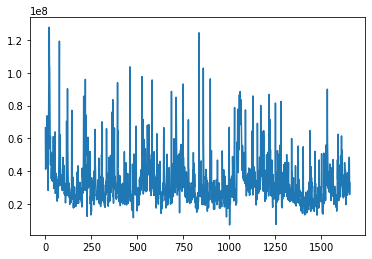

In [11]:
train_df['Volume'].plot()

In [12]:
x_train = train_df[['Open', 'High', 'Low']]

In [13]:
y_train = train_df['Close']

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size =0.1)
x_train.shape, x_test.shape

((1489, 3), (166, 3))

In [17]:
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [18]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x_train, mlr.coef_))

Intercept:  0.5638759670432592
Coefficients:


[('Open', -0.648751462580596),
 ('High', 0.8058501869022678),
 ('Low', 0.8427697006273164)]

In [19]:
y_pred_mlr= mlr.predict(x_test)

In [20]:
mlr.score(x_test,y_test)

0.9998127406040375

In [21]:
test_df = pd.read_csv('../input/data-analytics-ue20cs312/test.csv')
x_test = test_df[['Open', 'High', 'Low']]

In [22]:
y_pred_mlr= mlr.predict(x_test)

In [23]:
print(y_pred_mlr)

[2485.24407717 2473.77205446 2481.02691827 2438.42357527 2433.92515716
 2459.49424284 2440.66163922 2483.35148698 2479.69190284 2520.367448
 2535.34287513 2601.41928945 2610.0848876  2582.65669377 2539.63527863
 2493.12817774 2482.34761333 2483.97540877 2514.6714643  2447.81993542
 2436.32465938 2415.55681575 2423.10390292 2442.66447129 2423.38018595
 2391.33073672 2450.99101701 2453.99573754 2482.15225758 2490.64902336
 2425.27339314 2409.00901323 2386.58123368 2373.89632488 2386.06280082]


In [24]:
test_df['Close']=y_pred_mlr

In [25]:
test_df.head()

,Date,Open,High,Low,Volume,Close
0,2022-08-01,2455.71,2500.26,2447.87,24327600,2485.244077
1,2022-08-02,2466.68,2494.73,2447.99,19076300,2473.772054
2,2022-08-03,2473.29,2507.59,2449.39,27459700,2481.026918
3,2022-08-04,2475.98,2487.75,2419.88,23699600,2438.423575
4,2022-08-05,2414.66,2444.17,2409.01,18912400,2433.925157


In [26]:
test_df=test_df.drop(['Open'], axis=1)

In [27]:
test_df=test_df.drop(['High'], axis=1)
test_df=test_df.drop(['Low'], axis=1)
test_df=test_df.drop(['Volume'], axis=1)
#test_df.head()

In [28]:
test_df.shape

(35, 2)

In [29]:
test_df.to_csv('./submission.csv', header=True, columns = ['Date','Close'],index=False)